Let's import the Pandas and Seaborn libraries, and the `pyplot` module of the Matplotlib library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's load and explore the dataset

In [ ]:
df = pd.read_csv('heart.csv')
df

,age,sex,BP,cholestrol,heart disease
0,70,1,130.0,322.0,1.0
1,67,0,115.0,564.0,0.0
2,57,1,124.0,261.0,1.0
3,64,1,128.0,263.0,0.0
4,74,0,120.0,269.0,0.0
...,...,...,...,...,...
265,52,1,172.0,199.0,0.0
266,44,1,120.0,263.0,0.0
267,56,0,140.0,294.0,0.0
268,57,1,140.0,192.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            270 non-null    int64  
 1   sex            270 non-null    int64  
 2   BP             262 non-null    float64
 3   cholestrol     263 non-null    float64
 4   heart disease  269 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 10.7 KB


Let's make a histogram

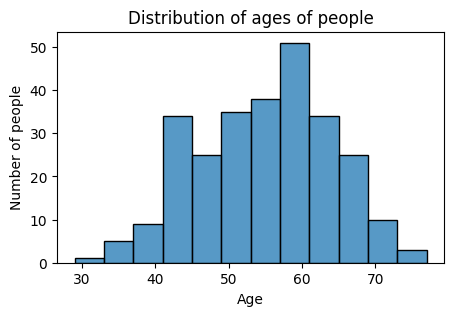

In [ ]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df, x = 'age')
plt.title('Distribution of ages of people')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

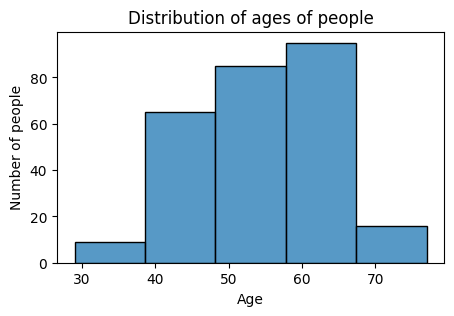

In [ ]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df, x = 'age', bins = 5)  # changing the number of bins
plt.title('Distribution of ages of people')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

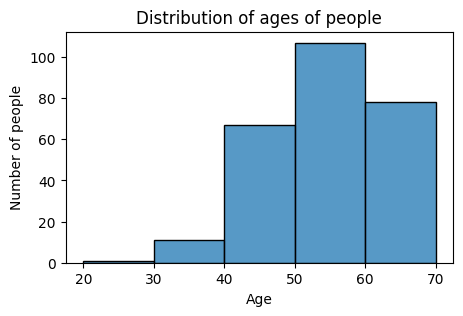

In [ ]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df, x = 'age', bins = range(20, 80, 10))  # adding a range of bins to fix their width
plt.title('Distribution of ages of people')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

Let's draw different histograms based on sex

In [ ]:
# Split the dataset into one for each sex
df_male = df[df['sex'] == 1]
df_female = df[df['sex'] == 0]

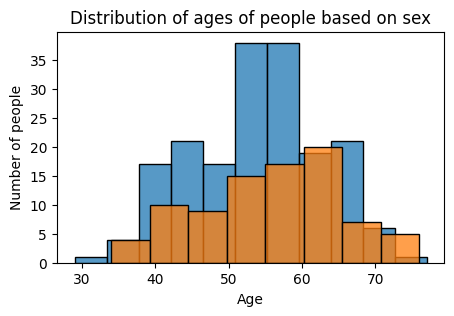

In [ ]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df_male, x = 'age')
sns.histplot(data = df_female, x = 'age')
plt.title('Distribution of ages of people based on sex')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

You can see that Seaborn was clever enough to add an alpha value and different colour to the two histograms. Let's add a legend to convey what the colours mean.

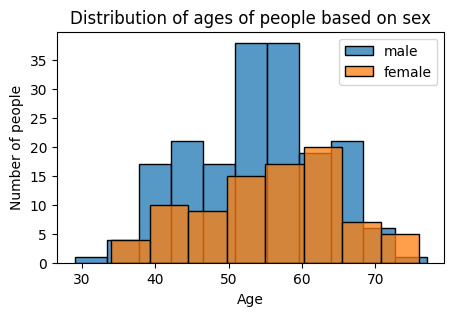

In [ ]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df_male, x = 'age', label = 'male')  # the label will show in the legend
sns.histplot(data = df_female, x = 'age', label = 'female')
plt.title('Distribution of ages of people based on sex')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.legend()  # add a legend
plt.show()

We could perform this same task with a single `sns.histplot()` call using the `hue` parameter to break down the data by gender. Seaborn will also automatically make a legend

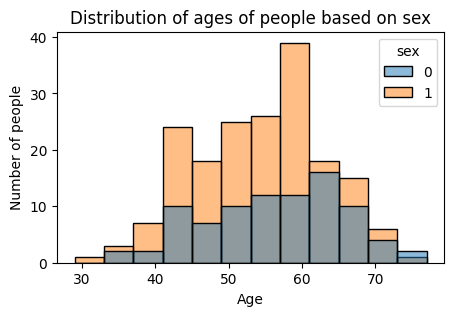

In [ ]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df, x = 'age', hue = 'sex')  # using the whole DataFrame again
plt.title('Distribution of ages of people based on sex')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.show()

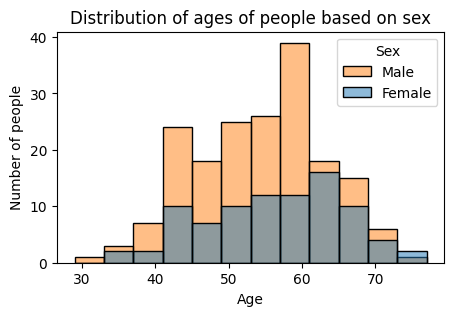

In [ ]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df, x = 'age', hue = 'sex')
plt.title('Distribution of ages of people based on sex')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.legend(title = 'Sex', labels = ['Male', 'Female'])  # we can manually rename the legend labels and title here
plt.show()

We could also represent this information as a stacked histogram

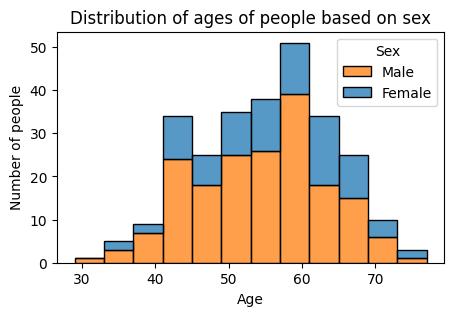

In [ ]:
plt.figure(figsize = (5, 3))
sns.histplot(data = df, x = 'age', hue = 'sex', multiple = 'stack')
plt.title('Distribution of ages of people based on sex')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.legend(title = 'Sex', labels = ['Male', 'Female'])
plt.show()

Another way to represent the data would be to present it side-by-side, using subplots

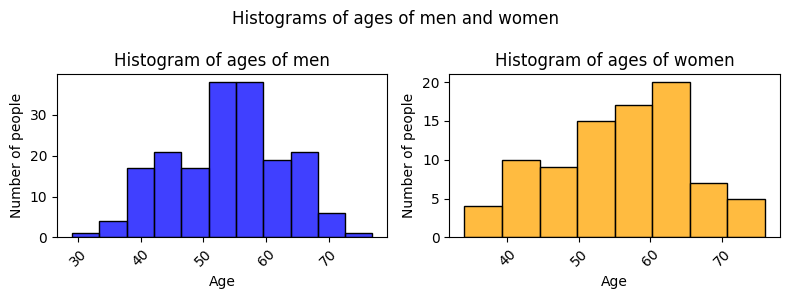

In [ ]:
plt.figure(figsize = (8, 3))
plt.subplot(1, 2, 1)  # the number of rows, number of columns, and index of the subplot
sns.histplot(data = df_male, x = 'age', color = 'blue')
plt.title('Histogram of ages of men')
plt.xlabel('Age')
plt.xticks(rotation = 45)  # adding some rotation to the x-axis ticks so they fit better
plt.ylabel('Number of people')

plt.subplot(1, 2, 2)
sns.histplot(data = df_female, x = 'age', color = 'orange')
plt.title('Histogram of ages of women')
plt.xlabel('Age')
plt.xticks(rotation = 45)  # adding some rotation to the x-axis ticks so they fit better
plt.ylabel('Number of people')

plt.suptitle('Histograms of ages of men and women')  # super-title
plt.tight_layout()  # automatically adjusts the padding between and around subplots
plt.show()

Let's make a shared y-axis so that the results are easier to compare

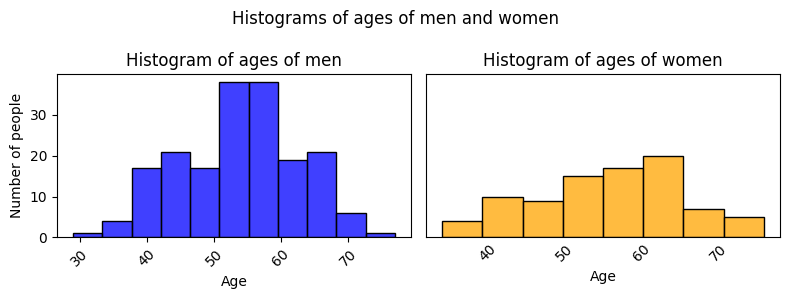

In [ ]:
plt.figure(figsize = (8, 3))
ax1 = plt.subplot(1, 2, 1)  # assigning the subplot to a variable
sns.histplot(data = df_male, x = 'age', color = 'blue')
plt.title('Histogram of ages of men')
plt.xlabel('Age')
plt.xticks(rotation = 45)
plt.ylabel('Number of people')

ax2 = plt.subplot(1, 2, 2, sharey = ax1)  # assigning the subplot to a variable and making a shared y-axis
sns.histplot(data = df_female, x = 'age', color = 'orange')
plt.title('Histogram of ages of women')
plt.xlabel('Age')
plt.xticks(rotation = 45)
plt.ylabel('')  # setting the ylabel as an empty string to remove it
ax2.tick_params(labelleft = False, length = 0)  # removing the y-axis ticks and tick labels for the second subplot

plt.suptitle('Histograms of ages of men and women')
plt.tight_layout()
plt.show()